# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_weather_data = {}
x = 1
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    geocoder_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit={1}&appid={weather_api_key}"
    geocoder_data = requests.get(geocoder_url).json()
    try:
        lat = geocoder_data[0]['lat']
        lon = geocoder_data[0]['lon']
        weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&units=imperial&appid={weather_api_key}"
        weather_data = requests.get(weather_url).json()
        print(f"Processing Record {x} | {city}")
        cities_weather_data[x]=weather_data
        x += 1
    except IndexError:
        cities.remove(city)
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | ushuaia
Processing Record 2 | la asuncion
Processing Record 3 | broome
Processing Record 4 | georgetown
City not found. Skipping...
Processing Record 5 | bredasdorp
Processing Record 6 | port moresby
Processing Record 7 | cockburn town
City not found. Skipping...
Processing Record 8 | barrow
Processing Record 9 | bluff
Processing Record 10 | mugumu
Processing Record 11 | clyde river
Processing Record 12 | teguldet
Processing Record 13 | puerto ayora
Processing Record 14 | hibbing
Processing Record 15 | jamestown
Processing Record 16 | busselton
Processing Record 17 | isangel
Processing Record 18 | maniitsoq
Processing Record 19 | los llanos de aridane
Processing Record 20 | saint-leu
Processing Record 21 | atuona
Processing Record 22 | punta arenas
Processing Record 23 | kamaishi
Processing Record 24 | thompson
Processing Record 25 | pangnirtung
Processing Record 26 | vaini
Processing Record 27 | chokurdakh
Pr

Processing Record 238 | wilmington
Processing Record 239 | port lincoln
Processing Record 240 | padang
City not found. Skipping...
Processing Record 241 | vaitupu
Processing Record 242 | pisco
Processing Record 243 | ilinskiy
Processing Record 244 | pervomayskiy
Processing Record 245 | fortuna
Processing Record 246 | lata
Processing Record 247 | baoshan
Processing Record 248 | moerai
Processing Record 249 | gamba
Processing Record 250 | rio gallegos
Processing Record 251 | olinda
Processing Record 252 | vao
Processing Record 253 | souillac
Processing Record 254 | knysna
Processing Record 255 | iqaluit
Processing Record 256 | bosilegrad
City not found. Skipping...
Processing Record 257 | nouadhibou
Processing Record 258 | tabat
Processing Record 259 | jiblah
Processing Record 260 | sept-iles
Processing Record 261 | umm lajj
Processing Record 262 | kaina
Processing Record 263 | mattru
Processing Record 264 | sayyan
Processing Record 265 | nanortalik
Processing Record 266 | mehriz
Process

Processing Record 478 | nortelandia
Processing Record 479 | sakrand
Processing Record 480 | nanga eboko
Processing Record 481 | esil
Processing Record 482 | tabas
Processing Record 483 | lorengau
Processing Record 484 | nola
Processing Record 485 | lincoln
Processing Record 486 | taltal
Processing Record 487 | ayyampettai
Processing Record 488 | fundacion
Processing Record 489 | razdolnoye
Processing Record 490 | belo oriente
Processing Record 491 | kango
Processing Record 492 | channel-port aux basques
Processing Record 493 | virden
Processing Record 494 | vung tau
Processing Record 495 | salumbar
Processing Record 496 | kushima
Processing Record 497 | alice springs
Processing Record 498 | newcastle
Processing Record 499 | kloulklubed
City not found. Skipping...
Processing Record 500 | qui nhon
City not found. Skipping...
Processing Record 501 | togur
Processing Record 502 | maragogi
Processing Record 503 | acevedo
Processing Record 504 | klyuchi
Processing Record 505 | kuito
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
len(cities) 
#Weird, my .remove() call in the exception above doesn't appear to work every time... 
#I figured out a work-around using numerical keys though

581

In [5]:
len(cities_weather_data)

555

In [6]:
pprint(cities_weather_data)
#'City' 106 is missing name and country... Area 51?
#184, and 363 also

{1: {'base': 'stations',
     'clouds': {'all': 40},
     'cod': 200,
     'coord': {'lat': -54.8061, 'lon': -68.3185},
     'dt': 1659622809,
     'id': 3833367,
     'main': {'feels_like': 35.29,
              'humidity': 80,
              'pressure': 1012,
              'temp': 35.29,
              'temp_max': 35.29,
              'temp_min': 33.46},
     'name': 'Ushuaia',
     'sys': {'country': 'AR',
             'id': 8303,
             'sunrise': 1659615410,
             'sunset': 1659646911,
             'type': 1},
     'timezone': -10800,
     'visibility': 10000,
     'weather': [{'description': 'scattered clouds',
                  'icon': '03d',
                  'id': 802,
                  'main': 'Clouds'}],
     'wind': {'deg': 0, 'speed': 1.14}},
 2: {'base': 'stations',
     'clouds': {'all': 75},
     'cod': 200,
     'coord': {'lat': -25.28, 'lon': -57.6344},
     'dt': 1659622810,
     'id': 3439389,
     'main': {'feels_like': 68.27,
              'humidity': 77

      'weather': [{'description': 'clear sky',
                   'icon': '01d',
                   'id': 800,
                   'main': 'Clear'}],
      'wind': {'deg': 153, 'gust': 9.86, 'speed': 9.53}},
 36: {'base': 'stations',
      'clouds': {'all': 26},
      'cod': 200,
      'coord': {'lat': -1.4998, 'lon': 33.8083},
      'dt': 1659622831,
      'id': 152451,
      'main': {'feels_like': 75.74,
               'grnd_level': 887,
               'humidity': 58,
               'pressure': 1010,
               'sea_level': 1010,
               'temp': 75.74,
               'temp_max': 75.74,
               'temp_min': 75.74},
      'name': 'Musoma',
      'sys': {'country': 'TZ', 'sunrise': 1659584955, 'sunset': 1659628348},
      'timezone': 10800,
      'visibility': 10000,
      'weather': [{'description': 'scattered clouds',
                   'icon': '03d',
                   'id': 802,
                   'main': 'Clouds'}],
      'wind': {'deg': 276, 'gust': 8.93, 'speed': 

                   'icon': '04n',
                   'id': 804,
                   'main': 'Clouds'}],
      'wind': {'deg': 216, 'gust': 5.95, 'speed': 5.77}},
 59: {'base': 'stations',
      'clouds': {'all': 100},
      'cod': 200,
      'coord': {'lat': -5.6443, 'lon': 132.7417},
      'dt': 1659622846,
      'id': 1623197,
      'main': {'feels_like': 85.98,
               'grnd_level': 1009,
               'humidity': 86,
               'pressure': 1010,
               'sea_level': 1010,
               'temp': 80.37,
               'temp_max': 80.37,
               'temp_min': 80.37},
      'name': 'Tual',
      'sys': {'country': 'ID', 'sunrise': 1659561523, 'sunset': 1659604294},
      'timezone': 32400,
      'visibility': 10000,
      'weather': [{'description': 'overcast clouds',
                   'icon': '04n',
                   'id': 804,
                   'main': 'Clouds'}],
      'wind': {'deg': 151, 'gust': 13.31, 'speed': 10.78}},
 60: {'base': 'stations',
      'cl

      'wind': {'deg': 65, 'gust': 5.23, 'speed': 5.82}},
 90: {'base': 'stations',
      'clouds': {'all': 69},
      'cod': 200,
      'coord': {'lat': 20.5592, 'lon': -76.9165},
      'dt': 1659622865,
      'id': 3542167,
      'main': {'feels_like': 86.63,
               'grnd_level': 1015,
               'humidity': 66,
               'pressure': 1016,
               'sea_level': 1016,
               'temp': 82.6,
               'temp_max': 82.6,
               'temp_min': 82.6},
      'name': 'Río Cauto',
      'sys': {'country': 'CU', 'sunrise': 1659609800, 'sunset': 1659656648},
      'timezone': -14400,
      'visibility': 10000,
      'weather': [{'description': 'broken clouds',
                   'icon': '04d',
                   'id': 803,
                   'main': 'Clouds'}],
      'wind': {'deg': 82, 'gust': 10.33, 'speed': 7.16}},
 91: {'base': 'stations',
      'clouds': {'all': 0},
      'cod': 200,
      'coord': {'lat': 32.378, 'lon': 48.4032},
      'dt': 165962286

                    'main': 'Clear'}],
       'wind': {'deg': 190, 'speed': 8.05}},
 109: {'base': 'stations',
       'clouds': {'all': 100},
       'cod': 200,
       'coord': {'lat': 67.889, 'lon': 13.0167},
       'dt': 1659622876,
       'id': 3142127,
       'main': {'feels_like': 54.1,
                'grnd_level': 1006,
                'humidity': 77,
                'pressure': 1007,
                'sea_level': 1007,
                'temp': 55.26,
                'temp_max': 57.27,
                'temp_min': 55.26},
       'name': 'Reine',
       'sys': {'country': 'NO',
               'id': 1707,
               'sunrise': 1659577170,
               'sunset': 1659646112,
               'type': 1},
       'timezone': 7200,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 214, 'gust': 26.17, 'speed': 21.3}},
 110: {'ba

 145: {'base': 'stations',
       'clouds': {'all': 100},
       'cod': 200,
       'coord': {'lat': -38.5545, 'lon': -58.7393},
       'dt': 1659622898,
       'id': 3430443,
       'main': {'feels_like': 46.56,
                'grnd_level': 1016,
                'humidity': 73,
                'pressure': 1018,
                'sea_level': 1018,
                'temp': 48.92,
                'temp_max': 48.92,
                'temp_min': 48.92},
       'name': 'Necochea',
       'sys': {'country': 'AR', 'sunrise': 1659610417, 'sunset': 1659647306},
       'timezone': -10800,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 249, 'gust': 6.89, 'speed': 5.66}},
 146: {'base': 'stations',
       'clouds': {'all': 20},
       'cod': 200,
       'coord': {'lat': 32.6794, 'lon': -16.8449},
       'dt': 1659622899,
       'id': 2270

                'temp_max': 81.25,
                'temp_min': 81.25},
       'name': "St John's",
       'sys': {'country': 'AG', 'sunrise': 1659606426, 'sunset': 1659652779},
       'timezone': -14400,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 81, 'gust': 24.99, 'speed': 22.37}},
 172: {'base': 'stations',
       'clouds': {'all': 67},
       'cod': 200,
       'coord': {'lat': 51.707, 'lon': 46.7484},
       'dt': 1659622915,
       'id': 529073,
       'main': {'feels_like': 82.38,
                'grnd_level': 1017,
                'humidity': 38,
                'pressure': 1019,
                'sea_level': 1019,
                'temp': 83.34,
                'temp_max': 83.34,
                'temp_min': 83.34},
       'name': 'Marks',
       'sys': {'country': 'RU', 'sunrise': 1659576005, 'sunset': 1659631086},

       'id': 3980207,
       'main': {'feels_like': 75.27,
                'grnd_level': 886,
                'humidity': 60,
                'pressure': 1014,
                'sea_level': 1014,
                'temp': 75.24,
                'temp_max': 75.24,
                'temp_min': 75.24},
       'name': 'Miguel Ahumada',
       'sys': {'country': 'MX', 'sunrise': 1659615951, 'sunset': 1659664702},
       'timezone': -21600,
       'visibility': 10000,
       'weather': [{'description': 'clear sky',
                    'icon': '01d',
                    'id': 800,
                    'main': 'Clear'}],
       'wind': {'deg': 316, 'gust': 5.1, 'speed': 3.91}},
 199: {'base': 'stations',
       'clouds': {'all': 100},
       'cod': 200,
       'coord': {'lat': 14.2515, 'lon': -5.9784},
       'dt': 1659622932,
       'id': 2452655,
       'main': {'feels_like': 94.73,
                'grnd_level': 978,
                'humidity': 42,
                'pressure': 1009,
              

 223: {'base': 'stations',
       'clouds': {'all': 100},
       'cod': 200,
       'coord': {'lat': -30.1657, 'lon': -50.2183},
       'dt': 1659622946,
       'id': 3466165,
       'main': {'feels_like': 63.75,
                'grnd_level': 1008,
                'humidity': 90,
                'pressure': 1010,
                'sea_level': 1010,
                'temp': 63.48,
                'temp_max': 63.48,
                'temp_min': 63.48},
       'name': 'Cidreira',
       'rain': {'1h': 0.65},
       'sys': {'country': 'BR', 'sunrise': 1659607462, 'sunset': 1659646171},
       'timezone': -10800,
       'visibility': 10000,
       'weather': [{'description': 'light rain',
                    'icon': '10d',
                    'id': 500,
                    'main': 'Rain'}],
       'wind': {'deg': 251, 'gust': 14.32, 'speed': 8.1}},
 224: {'base': 'stations',
       'clouds': {'all': 18},
       'cod': 200,
       'coord': {'lat': 22.6896, 'lon': 58.547},
       'dt': 165962294

       'main': {'feels_like': 56.14,
                'humidity': 95,
                'pressure': 1013,
                'temp': 56.34,
                'temp_max': 58.08,
                'temp_min': 54.68},
       'name': 'Fortuna',
       'sys': {'country': 'US',
               'id': 2040243,
               'sunrise': 1659618992,
               'sunset': 1659670130,
               'type': 2},
       'timezone': -25200,
       'visibility': 8047,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 214, 'gust': 3, 'speed': 1.99}},
 246: {'base': 'stations',
       'clouds': {'all': 3},
       'cod': 200,
       'coord': {'lat': -10.7242, 'lon': 165.7978},
       'dt': 1659622960,
       'id': 2178603,
       'main': {'feels_like': 79.45,
                'grnd_level': 1007,
                'humidity': 82,
                'pressure': 1010,
                'sea_l

       'name': 'Mitsamiouli',
       'rain': {'1h': 0.15},
       'sys': {'country': 'KM',
               'id': 2129,
               'sunrise': 1659583424,
               'sunset': 1659625326,
               'type': 1},
       'timezone': 10800,
       'visibility': 10000,
       'weather': [{'description': 'light rain',
                    'icon': '10d',
                    'id': 500,
                    'main': 'Rain'}],
       'wind': {'deg': 130, 'speed': 8.05}},
 274: {'base': 'stations',
       'clouds': {'all': 40},
       'cod': 200,
       'coord': {'lat': 60.8156, 'lon': -115.7866},
       'dt': 1659622978,
       'id': 5972762,
       'main': {'feels_like': 51.78,
                'humidity': 66,
                'pressure': 1013,
                'temp': 53.62,
                'temp_max': 53.62,
                'temp_min': 53.6},
       'name': 'Hay River',
       'sys': {'country': 'CA',
               'id': 1036,
               'sunrise': 1659612372,
               'sunset':

                'grnd_level': 1004,
                'humidity': 61,
                'pressure': 1016,
                'sea_level': 1016,
                'temp': 52.47,
                'temp_max': 52.47,
                'temp_min': 52.47},
       'name': 'Ofanleiti',
       'sys': {'country': 'IS', 'sunrise': 1659588222, 'sunset': 1659651037},
       'timezone': 0,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 330, 'gust': 20.78, 'speed': 18.1}},
 300: {'base': 'stations',
       'clouds': {'all': 66},
       'cod': 200,
       'coord': {'lat': -0.195, 'lon': -74.7807},
       'dt': 1659622994,
       'id': 3671437,
       'main': {'feels_like': 79.43,
                'grnd_level': 992,
                'humidity': 82,
                'pressure': 1014,
                'sea_level': 1014,
                'temp': 78.06,
        

       'id': 1731298,
       'main': {'feels_like': 87.51,
                'grnd_level': 1009,
                'humidity': 81,
                'pressure': 1009,
                'sea_level': 1009,
                'temp': 81.37,
                'temp_max': 81.37,
                'temp_min': 81.37},
       'name': 'Aloleng',
       'sys': {'country': 'PH', 'sunrise': 1659562958, 'sunset': 1659609080},
       'timezone': 28800,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04n',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 37, 'gust': 5.44, 'speed': 4.72}},
 334: {'base': 'stations',
       'clouds': {'all': 66},
       'cod': 200,
       'coord': {'lat': 42.4367, 'lon': 22.311},
       'dt': 1659623015,
       'id': 786562,
       'main': {'feels_like': 74.35,
                'grnd_level': 868,
                'humidity': 29,
                'pressure': 1016,
                '

       'wind': {'deg': 24, 'gust': 6.51, 'speed': 4.34}},
 359: {'base': 'stations',
       'clouds': {'all': 40},
       'cod': 200,
       'coord': {'lat': 24.3383, 'lon': 124.1578},
       'dt': 1659623030,
       'id': 1861416,
       'main': {'feels_like': 96.87,
                'humidity': 84,
                'pressure': 1011,
                'temp': 84.43,
                'temp_max': 84.43,
                'temp_min': 84.43},
       'name': 'Ishigaki',
       'sys': {'country': 'JP',
               'id': 8139,
               'sunrise': 1659561188,
               'sunset': 1659608749,
               'type': 1},
       'timezone': 32400,
       'visibility': 10000,
       'weather': [{'description': 'scattered clouds',
                    'icon': '03n',
                    'id': 802,
                    'main': 'Clouds'}],
       'wind': {'deg': 170, 'speed': 8.05}},
 360: {'base': 'stations',
       'clouds': {'all': 92},
       'cod': 200,
       'coord': {'lat': 43.3301, 'lon':

       'weather': [{'description': 'scattered clouds',
                    'icon': '03n',
                    'id': 802,
                    'main': 'Clouds'}],
       'wind': {'deg': 110, 'speed': 11.5}},
 383: {'base': 'stations',
       'clouds': {'all': 0},
       'cod': 200,
       'coord': {'lat': 27.8734, 'lon': -0.2875},
       'dt': 1659623045,
       'id': 2508813,
       'main': {'feels_like': 109.13,
                'humidity': 9,
                'pressure': 1010,
                'temp': 115.02,
                'temp_max': 115.02,
                'temp_min': 115.02},
       'name': 'Adrar',
       'sys': {'country': 'DZ',
               'id': 1098,
               'sunrise': 1659590725,
               'sunset': 1659638943,
               'type': 1},
       'timezone': 3600,
       'visibility': 5000,
       'weather': [{'description': 'clear sky',
                    'icon': '01d',
                    'id': 800,
                    'main': 'Clear'}],
       'wind': {'deg': 1

       'id': 3137469,
       'main': {'feels_like': 54.05,
                'humidity': 76,
                'pressure': 1007,
                'temp': 55.26,
                'temp_max': 58.86,
                'temp_min': 55.26},
       'name': 'Sørland',
       'sys': {'country': 'NO',
               'id': 1707,
               'sunrise': 1659577451,
               'sunset': 1659645987,
               'type': 1},
       'timezone': 7200,
       'visibility': 10000,
       'weather': [{'description': 'broken clouds',
                    'icon': '04d',
                    'id': 803,
                    'main': 'Clouds'}],
       'wind': {'deg': 200, 'speed': 14.97}},
 405: {'base': 'stations',
       'clouds': {'all': 0},
       'cod': 200,
       'coord': {'lat': 38.1392, 'lon': -0.7693},
       'dt': 1659623058,
       'id': 2518842,
       'main': {'feels_like': 94.26,
                'humidity': 44,
                'pressure': 1014,
                'temp': 91.29,
                'temp_m

       'name': 'São Gotardo',
       'sys': {'country': 'BR',
               'id': 2005160,
               'sunrise': 1659605490,
               'sunset': 1659646141,
               'type': 2},
       'timezone': -10800,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 13, 'gust': 8.03, 'speed': 7.76}},
 437: {'base': 'stations',
       'clouds': {'all': 25},
       'cod': 200,
       'coord': {'lat': -5.091, 'lon': -81.1061},
       'dt': 1659623077,
       'id': 3694112,
       'main': {'feels_like': 65.41,
                'grnd_level': 1006,
                'humidity': 76,
                'pressure': 1015,
                'sea_level': 1015,
                'temp': 65.57,
                'temp_max': 65.57,
                'temp_min': 65.57},
       'name': 'Paita',
       'sys': {'country': 'PE', 'sunrise': 1659612799, 'suns

               'sunrise': 1659622550,
               'sunset': 1659686371,
               'type': 1},
       'timezone': -28800,
       'visibility': 10000,
       'weather': [{'description': 'overcast clouds',
                    'icon': '04d',
                    'id': 804,
                    'main': 'Clouds'}],
       'wind': {'deg': 90, 'speed': 9.22}},
 465: {'base': 'stations',
       'clouds': {'all': 100},
       'cod': 200,
       'coord': {'lat': -34.4227, 'lon': -58.5809},
       'dt': 1659623094,
       'id': 3427753,
       'main': {'feels_like': 42.24,
                'humidity': 84,
                'pressure': 1017,
                'temp': 46.71,
                'temp_max': 47.28,
                'temp_min': 46.38},
       'name': 'Partido de Tigre',
       'sys': {'country': 'AR',
               'id': 8232,
               'sunrise': 1659609907,
               'sunset': 1659647741,
               'type': 1},
       'timezone': -10800,
       'visibility': 9000,
       '

       'sys': {'country': 'SS', 'sunrise': 1659585002, 'sunset': 1659629338},
       'timezone': 7200,
       'visibility': 10000,
       'weather': [{'description': 'light rain',
                    'icon': '10d',
                    'id': 500,
                    'main': 'Rain'}],
       'wind': {'deg': 19, 'gust': 3.58, 'speed': 3.38}},
 492: {'base': 'stations',
       'clouds': {'all': 100},
       'cod': 200,
       'coord': {'lat': 47.5949, 'lon': -59.1325},
       'dt': 1659623111,
       'id': 5919815,
       'main': {'feels_like': 67.23,
                'grnd_level': 1011,
                'humidity': 77,
                'pressure': 1018,
                'sea_level': 1018,
                'temp': 67.19,
                'temp_max': 67.19,
                'temp_min': 67.19},
       'name': 'Channel-Port aux Basques',
       'sys': {'country': 'CA', 'sunrise': 1659602268, 'sunset': 1659655644},
       'timezone': -9000,
       'visibility': 10000,
       'weather': [{'description

       'main': {'feels_like': 88.2,
                'grnd_level': 1012,
                'humidity': 53,
                'pressure': 1013,
                'sea_level': 1013,
                'temp': 85.64,
                'temp_max': 85.64,
                'temp_min': 85.64},
       'name': 'Acaraú',
       'sys': {'country': 'BR', 'sunrise': 1659602799, 'sunset': 1659645987},
       'timezone': -10800,
       'visibility': 10000,
       'weather': [{'description': 'few clouds',
                    'icon': '02d',
                    'id': 801,
                    'main': 'Clouds'}],
       'wind': {'deg': 88, 'gust': 17.69, 'speed': 15.21}},
 527: {'base': 'stations',
       'clouds': {'all': 44},
       'cod': 200,
       'coord': {'lat': -3.5459, 'lon': 118.9607},
       'dt': 1659623133,
       'id': 1636806,
       'main': {'feels_like': 78.6,
                'grnd_level': 1008,
                'humidity': 78,
                'pressure': 1010,
                'sea_level': 1010,
     

 551: {'base': 'stations',
       'clouds': {'all': 40},
       'cod': 200,
       'coord': {'lat': 9.6187, 'lon': 6.5476},
       'dt': 1659623148,
       'id': 2330100,
       'main': {'feels_like': 87.51,
                'humidity': 69,
                'pressure': 1012,
                'temp': 82.69,
                'temp_max': 82.69,
                'temp_min': 82.69},
       'name': 'Minna',
       'rain': {'1h': 0.98},
       'sys': {'country': 'NG',
               'id': 1172,
               'sunrise': 1659590657,
               'sunset': 1659635730,
               'type': 1},
       'timezone': 3600,
       'visibility': 10000,
       'weather': [{'description': 'light rain',
                    'icon': '10d',
                    'id': 500,
                    'main': 'Rain'}],
       'wind': {'deg': 290, 'speed': 8.05}},
 552: {'base': 'stations',
       'clouds': {'all': 0},
       'cod': 200,
       'coord': {'lat': 35.3126, 'lon': 46.9979},
       'dt': 1659623148,
       'i

In [11]:

names_list = []
lats_list = []
lngs_list = []
maxtemps_list = []
humidity_list = []
cloudiness_list = []
windspeeds_list = []
countries_list = []
dates_list = []
for x in cities_weather_data:
    #print(x)
    if x not in [106,184,363]:
        names_list.append(cities_weather_data[x]['name'])
        lats_list.append(cities_weather_data[x]['coord']['lat'])
        lngs_list.append(cities_weather_data[x]['coord']['lon'])
        maxtemps_list.append(cities_weather_data[x]['main']['temp_max'])
        humidity_list.append(cities_weather_data[x]['main']['humidity'])
        cloudiness_list.append(cities_weather_data[x]['clouds']['all'])
        windspeeds_list.append(cities_weather_data[x]['wind']['speed'])
        countries_list.append(cities_weather_data[x]['sys']['country'])
        dates_list.append(cities_weather_data[x]['dt'])
cities_weather_df = pd.DataFrame({'City':names_list,'Lat':lats_list,'Lng':lngs_list,'Max Temp':maxtemps_list,
                                 'Humidity':humidity_list,'Cloudiness':cloudiness_list,'Wind Speed':windspeeds_list,
                                 'Country':countries_list,'Date':dates_list})
cities_weather_df.to_csv(output_data_file, index = False)
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8061,-68.3185,35.29,80,40,1.14,AR,1659622809
1,Asunción,-25.2800,-57.6344,68.14,77,75,12.66,PY,1659622810
2,Broome,-17.9567,122.2240,64.29,88,9,3.44,AU,1659622811
3,Georgetown,6.8137,-58.1624,79.09,100,75,2.30,GY,1659622811
4,Bredasdorp,-34.5331,20.0428,65.79,52,65,4.27,ZA,1659622812
...,...,...,...,...,...,...,...,...,...
547,Minna,9.6187,6.5476,82.69,69,40,8.05,NG,1659623148
548,Sanandij,35.3126,46.9979,98.85,7,0,9.22,IR,1659623148
549,Guayabal,5.0323,-74.8832,79.63,76,100,1.61,CO,1659623149
550,Ust'-Kamchatsk,56.2400,162.5370,56.57,83,62,6.22,RU,1659623150


In [12]:
#Found solution for using lambda functions here 
#https://stackoverflow.com/questions/19894939/calculate-arbitrary-percentile-on-pandas-groupby
weather_df = cities_weather_df.drop(columns=['City','Country'])
quarter = lambda x: x.quantile(.25)
half = lambda x: x.quantile(.5)
three_quarters =  lambda x: x.quantile(.75)
summary_df = weather_df.agg(['count','mean','std','min', quarter, half, three_quarters, 'max'])
summary_df.index = ['count','mean','std','min','25%','50%','75%','max']                            
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.919943,19.757011,72.772917,66.846014,58.166667,8.663696,1.659623e+09
std,33.369669,87.950584,15.261862,23.228835,38.502379,5.804004,1.078572e+02
min,-54.806100,-179.413100,34.570000,7.000000,0.000000,0.000000,1.659622e+09
25%,-5.757950,-53.508700,61.730000,53.750000,20.000000,4.380000,1.659623e+09
50%,25.369400,23.008650,75.210000,73.000000,68.500000,7.350000,1.659623e+09
75%,49.157575,88.420975,82.035000,85.000000,100.000000,11.770000,1.659623e+09
max,78.223200,178.680800,120.960000,100.000000,100.000000,34.520000,1.659623e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#max above is 100, so no cities are supersaturated

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

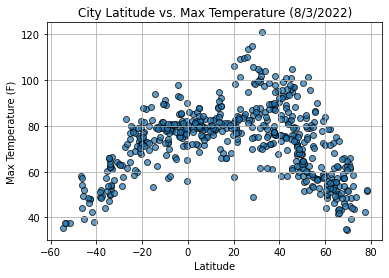

In [13]:
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Max Temp'],alpha=0.7,edgecolors='black')
plt.title('City Latitude vs. Max Temperature (8/3/2022)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/latvstemp.png", format = 'png')
plt.show()

## Latitude vs. Humidity Plot

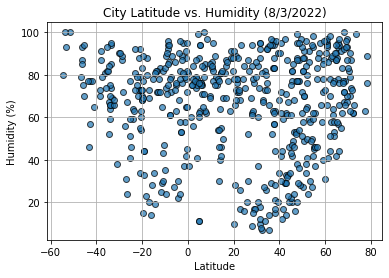

In [14]:
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Humidity'],alpha=0.7,edgecolors='black')
plt.title('City Latitude vs. Humidity (8/3/2022)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("output_data/latvshumid.png", format = 'png')
plt.show()

## Latitude vs. Cloudiness Plot

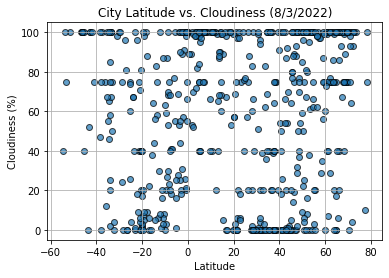

In [15]:
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Cloudiness'],alpha=0.7,edgecolors='black')
plt.title('City Latitude vs. Cloudiness (8/3/2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output_data/latvscloud.png", format = 'png')
plt.show()

## Latitude vs. Wind Speed Plot

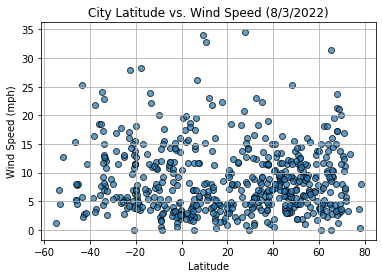

In [16]:
plt.scatter(cities_weather_df['Lat'],cities_weather_df['Wind Speed'],alpha=0.7,edgecolors='black')
plt.title('City Latitude vs. Wind Speed (8/3/2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("output_data/latvswind.png", format = 'png')
plt.show()

## Linear Regression

In [17]:
#Separate data from northern and southern hemispheres
north_df = cities_weather_df.loc[cities_weather_df['Lat'] >= 0]
south_df = cities_weather_df.loc[cities_weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.5637079228519533


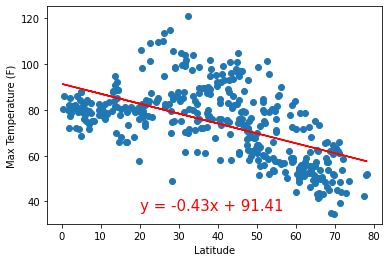

In [18]:
correlation = st.pearsonr(north_df["Lat"],north_df["Max Temp"])
print(f"The r-value is: {correlation[0]}")

x_values = north_df["Lat"]
y_values = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/Nlatvstempregress.png", format = 'png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.785952327886373


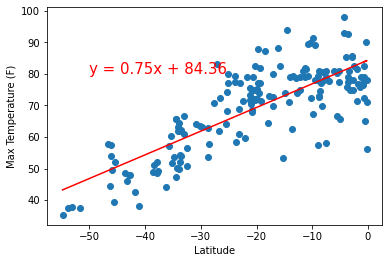

In [19]:
correlation = st.pearsonr(south_df["Lat"],south_df["Max Temp"])
print(f"The r-value is: {correlation[0]}")

x_values = south_df["Lat"]
y_values = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,80),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/Slatvstempregress.png", format = 'png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05048474754998266


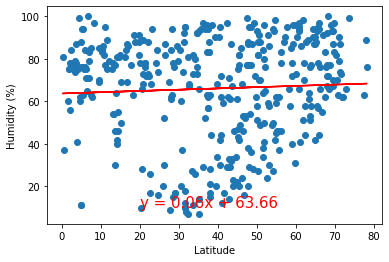

In [20]:
correlation = st.pearsonr(north_df["Lat"],north_df["Humidity"])
print(f"The r-value is: {correlation[0]}")

x_values = north_df["Lat"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,10),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Nlatvshumidregress.png", format = 'png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.16581919170280657


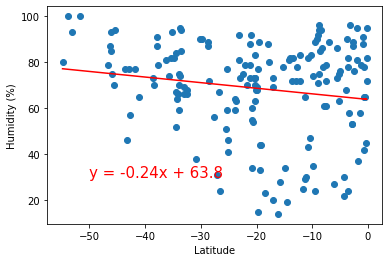

In [21]:
correlation = st.pearsonr(south_df["Lat"],south_df["Humidity"])
print(f"The r-value is: {correlation[0]}")

x_values = south_df["Lat"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,30),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Slatvshumidregress.png", format = 'png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.02092535625263527


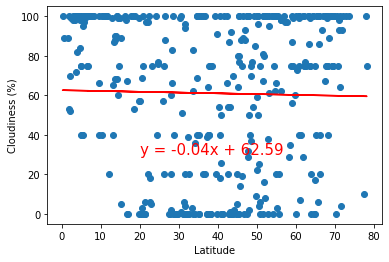

In [22]:
correlation = st.pearsonr(north_df["Lat"],north_df["Cloudiness"])
print(f"The r-value is: {correlation[0]}")

x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,30),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Nlatvscloudregress.png", format = 'png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.1598250860694517


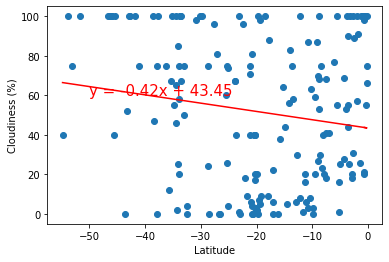

In [23]:
correlation = st.pearsonr(south_df["Lat"],south_df["Cloudiness"])
print(f"The r-value is: {correlation[0]}")

x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,60),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Slatvscloudregress.png", format = 'png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004625306421319926


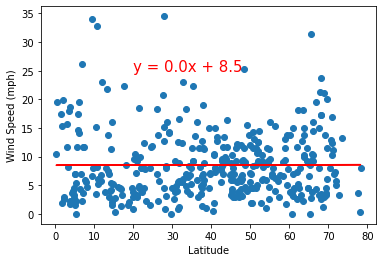

In [24]:
correlation = st.pearsonr(north_df["Lat"],north_df["Wind Speed"])
print(f"The r-value is: {correlation[0]}")

x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,25),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Nlatvswindregress.png", format = 'png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1261894974405127


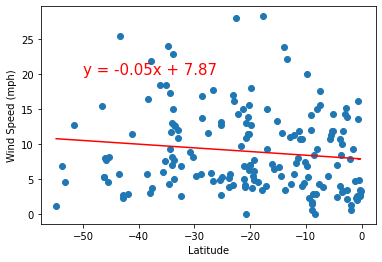

In [25]:
correlation = st.pearsonr(south_df["Lat"],south_df["Wind Speed"])
print(f"The r-value is: {correlation[0]}")

x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,20),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Slatvswindregress.png", format = 'png')
plt.show()